In [2]:
import pandas as pd
from google.colab import files
import io

# Load your social media dataset by uploading it
print("Please upload your social media dataset (CSV file):")
uploaded = files.upload()

for filename in uploaded.keys():
    df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
    print(f"Successfully loaded '{filename}'")

# Show first rows and all column names
display(df.head())
print("\nColumns Available:\n", df.columns.tolist())

Please upload your social media dataset (CSV file):


Saving socialmedia.csv to socialmedia.csv
Successfully loaded 'socialmedia.csv'


,User ID,Username,Platform,Post ID,Post Text,Post Timestamp,Likes/Reactions,Comments,Shares/Retweets,Hashtags,...,Account Creation Date,Account Verification,User Engagement,User Interactions,User Activity,User Bio,User Description 1,User Description 2,Server Post,User Language
0,101,@adventureSeeker,Instagram,82036,"""Experiencing the thrill of a lifetime! #Adven...",30-07-2023 14:45,1500,250,120,#AdventureTime,...,10-05-2019,Verified,1870,15700,3 posts per week,Adventure enthusiast,Nature lover,Seeker of wanderlust ??,"California, USA",English
1,215,@foodieTraveler,Twitter,12463,"""Indulging in local delicacies! #FoodieTravels""",30-07-2023 19:30,850,70,50,#FoodieTravels,...,15-09-2017,Not verified,970,8300,5 posts per week,Culinary explorer,Street food connoisseur,Travel addict ??,"London, UK",English
2,303,@wellnessJourney,Facebook,45982,"""Finding peace and balance in nature!",30-07-2023 08:15,680,80,40,#WellnessJourney,...,02-03-2020,Not verified,800,6200,2 posts per week,Wellness enthusiast,Yogi in training,Mindfulness advocate,"San Francisco, USA",English
3,404,@fitnessFreak,Instagram,16572,"""Pushing my limits in the gym!",30-07-2023 12:30,1850,350,180,#FitnessGoals,...,12-08-2016,Verified,2380,32750,4 posts per week,Fitness enthusiast,Health is wealth,Workout addict,"Los Angeles, USA",English
4,521,@foodExplorer,Twitter,75589,"""Discovering unique flavors around the world!",30-07-2023 16:20,950,80,60,#Foodies,...,28-02-2018,Not verified,1090,9080,3 posts per week,Culinary adventurer,Gastronomic traveler,Bon app?it!,"Paris, France",English



Columns Available:
 ['User ID', 'Username', 'Platform', 'Post ID', 'Post Text', 'Post Timestamp', 'Likes/Reactions', 'Comments', 'Shares/Retweets', 'Hashtags', 'Mentions', 'Media Type', 'Media URL', 'Post URL', 'Location', 'Privacy Settings', 'User Followers', 'User Following', 'Account Creation Date', 'Account Verification', 'User Engagement', 'User Interactions', 'User Activity', 'User Bio', 'User Description 1', 'User Description 2', 'Server Post', 'User Language']


Best Posting Time (Which time gives best engagement?)

Best Engagement Time (Top 5 Hours):


/tmp/ipython-input-195169868.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Post Timestamp'] = pd.to_datetime(df['Post Timestamp'], errors='coerce')


,Engagement
Hour,
15,1656.666667
11,1430.000000
9,1420.000000
12,1320.000000
18,1133.333333


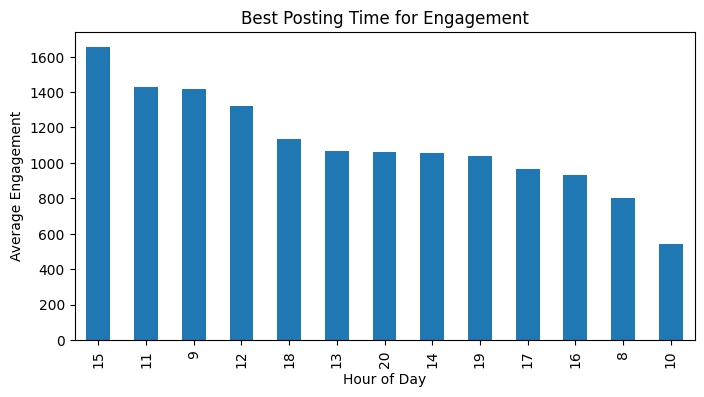

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df['Post Timestamp'] = pd.to_datetime(df['Post Timestamp'], errors='coerce')
df['Hour'] = df['Post Timestamp'].dt.hour

# Engagement = Likes + Comments + Shares
df['Engagement'] = df['Likes/Reactions'] + df['Comments'] + df['Shares/Retweets']

time_eng = df.groupby('Hour')['Engagement'].mean().sort_values(ascending=False)

print("Best Engagement Time (Top 5 Hours):")
display(time_eng.head(5))

plt.figure(figsize=(8,4))
time_eng.plot(kind='bar')
plt.title("Best Posting Time for Engagement")
plt.xlabel("Hour of Day")
plt.ylabel("Average Engagement")
plt.show()


Best Hashtags for Engagement

Top 5 Performing Hashtags:


,Engagement
Hashtags,
#PetLove,2720.0
#FitnessGoals,2380.0
#Fashionista,2290.0
#FitnessMotivation,1870.0
#AdventureTime,1870.0


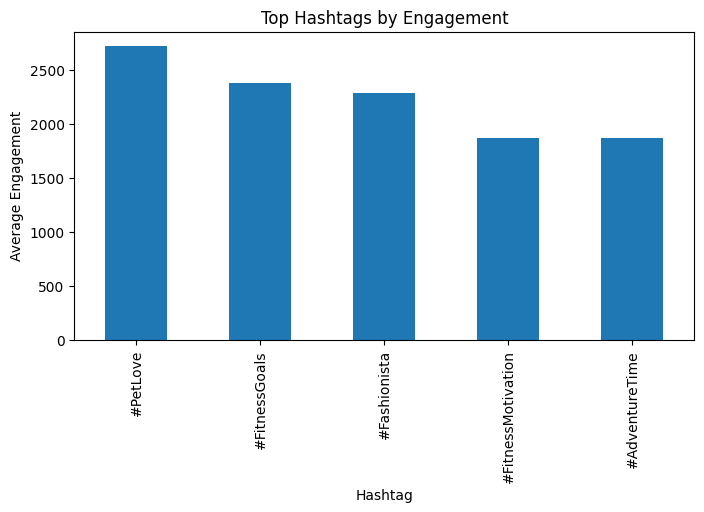

In [4]:
# Split hashtags into separate rows
df_hashtag = df.dropna(subset=['Hashtags']).copy()
df_hashtag['Hashtags'] = df_hashtag['Hashtags'].str.split(',')

df_hashtag = df_hashtag.explode('Hashtags')
df_hashtag['Hashtags'] = df_hashtag['Hashtags'].str.strip()

hashtag_eng = df_hashtag.groupby('Hashtags')['Engagement'].mean().sort_values(ascending=False)

print("Top 5 Performing Hashtags:")
display(hashtag_eng.head(5))

plt.figure(figsize=(8,4))
hashtag_eng.head(5).plot(kind='bar')
plt.title("Top Hashtags by Engagement")
plt.xlabel("Hashtag")
plt.ylabel("Average Engagement")
plt.show()


Engagement by Content Category

Best Content Categories:


,Engagement
Category,
Fitness,2125.000000
Other,1130.555556
Travel,970.000000


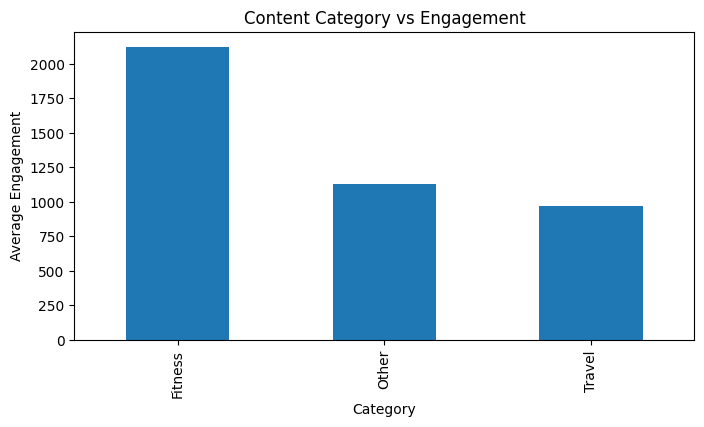

In [5]:
def categorize(text):
    text = str(text).lower()
    if "travel" in text: return "Travel"
    if "food" in text: return "Food"
    if "fitness" in text or "gym" in text: return "Fitness"
    if "health" in text or "wellness" in text: return "Wellness"
    return "Other"

df['Category'] = df['Post Text'].apply(categorize)

cat_eng = df.groupby('Category')['Engagement'].mean().sort_values(ascending=False)

print("Best Content Categories:")
display(cat_eng.head(5))

plt.figure(figsize=(8,4))
cat_eng.head(5).plot(kind='bar')
plt.title("Content Category vs Engagement")
plt.xlabel("Category")
plt.ylabel("Average Engagement")
plt.show()


Sentiment vs Engagement

Sentiment Based Engagement:


,Engagement
Sentiment,
Neutral,1237.931034
Negative,1080.000000
Positive,993.333333


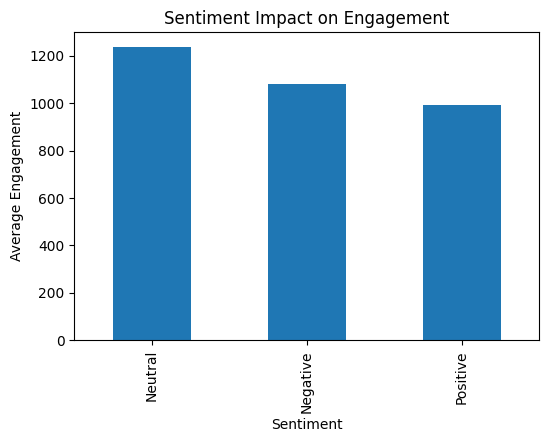

In [7]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0: return 'Positive'
    elif analysis.sentiment.polarity < 0: return 'Negative'
    else: return 'Neutral'

df['Sentiment'] = df['Post Text'].apply(get_sentiment)

sent_eng = df.groupby('Sentiment')['Engagement'].mean().sort_values(ascending=False)

print("Sentiment Based Engagement:")
display(sent_eng)

plt.figure(figsize=(6,4))
sent_eng.plot(kind='bar')
plt.title("Sentiment Impact on Engagement")
plt.xlabel("Sentiment")
plt.ylabel("Average Engagement")
plt.show()

Verified Badge vs Engagement

Verified Badge vs Engagement:


,Engagement
Account Verification,
Not verified,988.888889
Verified,1601.666667


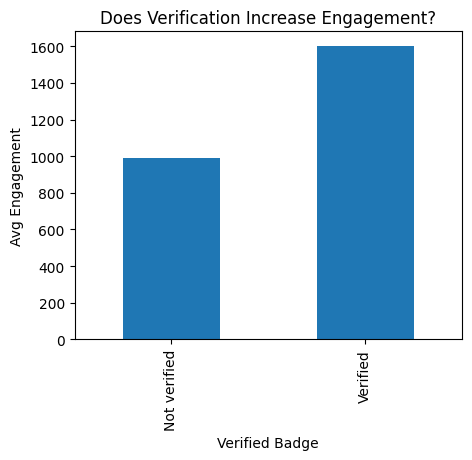

In [9]:
badge_eng = df.groupby('Account Verification')['Engagement'].mean()

print("Verified Badge vs Engagement:")
display(badge_eng)

plt.figure(figsize=(5,4))
badge_eng.plot(kind='bar')
plt.title("Does Verification Increase Engagement?")
plt.xlabel("Verified Badge")
plt.ylabel("Avg Engagement")
plt.show()

Country / Server Location Performance

Top 5 Locations by Engagement:


,Engagement
Server Post,
"California, USA",1870.0
"Vancouver, Canada",1500.0
"New York City, USA",1474.0
"Seattle, USA",1400.0
"Los Angeles, USA",1390.0


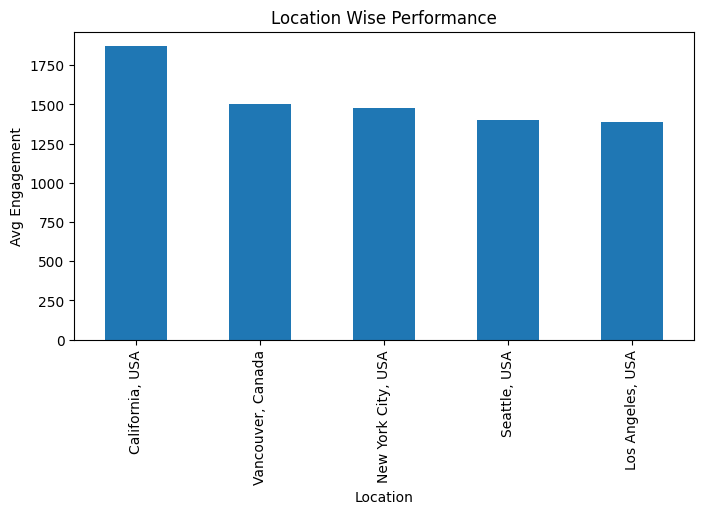

In [11]:
loc_eng = df.groupby('Server Post')['Engagement'].mean().sort_values(ascending=False)

print("Top 5 Locations by Engagement:")
display(loc_eng.head(5))

plt.figure(figsize=(8,4))
loc_eng.head(5).plot(kind='bar')
plt.title("Location Wise Performance")
plt.xlabel("Location")
plt.ylabel("Avg Engagement")
plt.show()

Topic Clustering from Hashtags

Top 10 Most Used Hashtags:


,count
Hashtags,
#Wanderlust,2
#AdventureTime,1
#FoodieTravels,1
#WellnessJourney,1
#FitnessGoals,1
#Foodies,1
#TechNews,1
#PetLove,1
#BookNerd,1


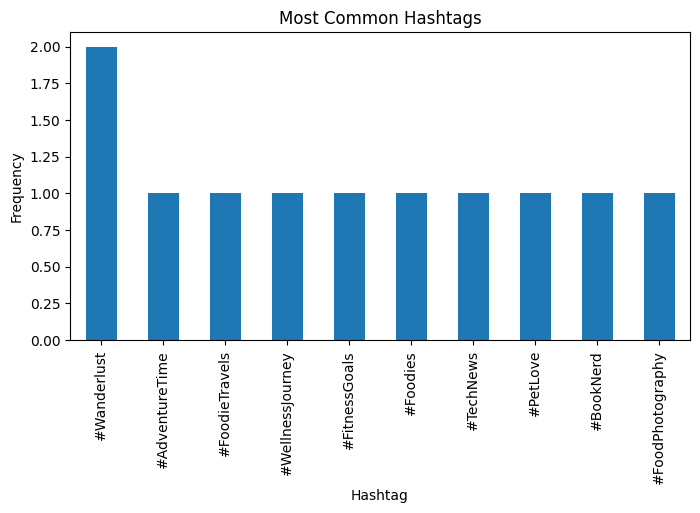

In [12]:
hashtag_count = df_hashtag['Hashtags'].value_counts().head(10)

print("Top 10 Most Used Hashtags:")
display(hashtag_count)

plt.figure(figsize=(8,4))
hashtag_count.plot(kind='bar')
plt.title("Most Common Hashtags")
plt.xlabel("Hashtag")
plt.ylabel("Frequency")
plt.show()
